# Read the observation data from file

In [140]:
import numpy as np

lc = np.genfromtxt("data/PG1302_CRTS.dat", names="mjd, mag, magerr", delimiter=",", skip_header=1)
#print(str(lc['mag']))

# Plot the observed signal

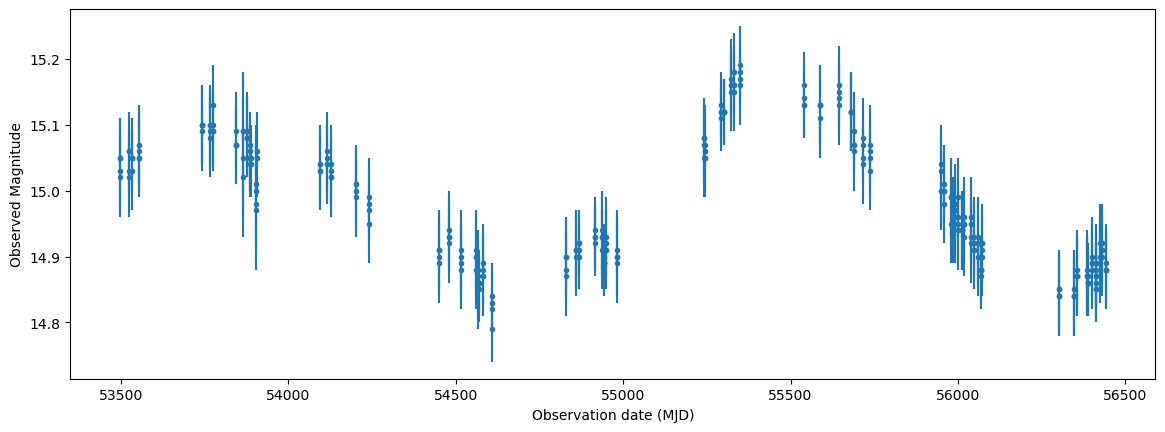

In [142]:
import matplotlib.pyplot as plt

t = lc["mjd"] 
mag = lc["mag"] 
magerr = lc['magerr']

plt.figure().set_figwidth(14)
plt.xlabel("Observation date (MJD)")
plt.ylabel("Observed Magnitude")
#plt.plot(t, mag, marker='None', linestyle='-', zorder=1, lw=1)
plt.errorbar(t, mag, yerr=magerr, fmt=".", zorder=0)

plt.show()

# Method to aggregate data into bins of "n" days. This is not used.

In [143]:
from scipy.stats import binned_statistic

# Use binned_statistic to calculate mean within each bin
def get_binned_statistic(num_bins, t, mag):
    bin_mag, bin_edges, binnumber = binned_statistic(t, mag, statistic=np.nanmean, bins=num_bins)
    bin_magerr, bin_edges, binnumber = binned_statistic(t, magerr, statistic=np.nanmean, bins=num_bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_t = bin_edges[1:] - bin_width/2

    filter = np.isfinite(bin_mag)
    #print(str(filter[:10]))
    bin_mag = bin_mag[filter]
    bin_t = bin_t[filter]
    bin_magerr = bin_magerr[filter]
    return (bin_t, bin_mag, bin_magerr)
    
#plt.scatter(bin_t, bin_mag)
#plt.show()

# Create the Lomb Scargle Periodogram

## 1th strongest signal: 0.8835
at freq(1/d):     0.0006
at period(d):     1705d
## 2th strongest signal: 0.3507
at freq(1/d):     0.0021
at period(d):     465d
## 3th strongest signal: 0.5142
at freq(1/d):     0.0033
at period(d):     301d


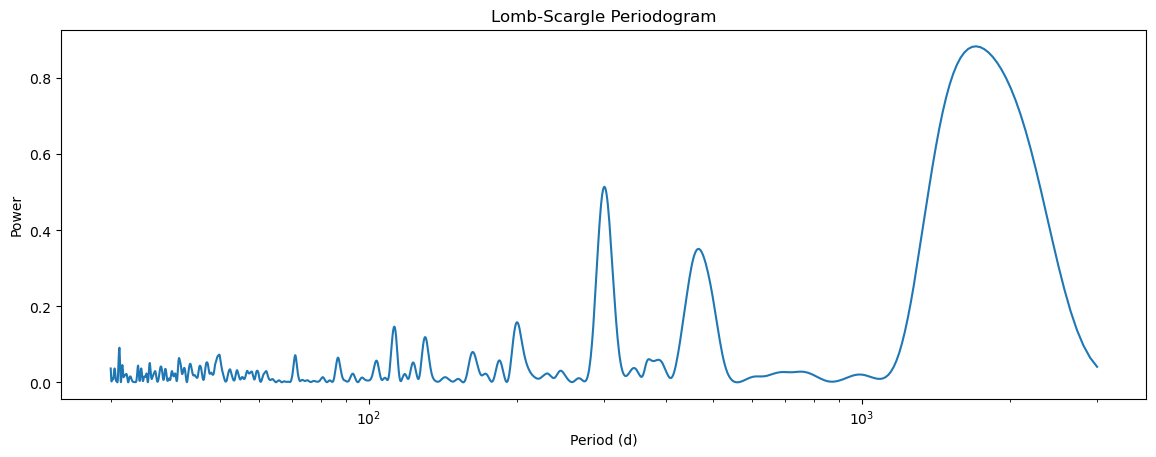

In [145]:
import astropy.units as u
from astropy.timeseries import LombScargle
import scipy.signal as sig 

#Total 2946 days of observation -> max period ~3000d. 
# We consider min period as 30d
# Create 3000 frequency buckets (~1 per day of observation)
freqs = np.linspace(1/3000, 1/30,num=3000) 

# Perform analysis
ls = LombScargle(t , mag)
powers = ls.power(freqs)

# Find the frequencies with the strongest signal
top3ind, _ = sig.find_peaks(powers, height=0.2)
#k = np.unravel_index(np.argmax(powers), powers.shape)
#print(str(top3ind))    
for j, k in enumerate(top3ind):
    print('## {0}th strongest signal: {1:.4f}'.format(j+1, powers[k]))
    print('at freq(1/d):     {0:.4f}'.format(freqs[k]))
    print('at period(d):     {0:.0f}d'.format(1/freqs[k]))

plt.figure().set_figwidth(14)
plt.xlabel("Period (d)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.plot(1.0/freqs, powers)
plt.xscale("log")
plt.show()
# TODO: Find the FAP (False probability)

# Plot the top3 sinusoidal frequencies along with the observed signal

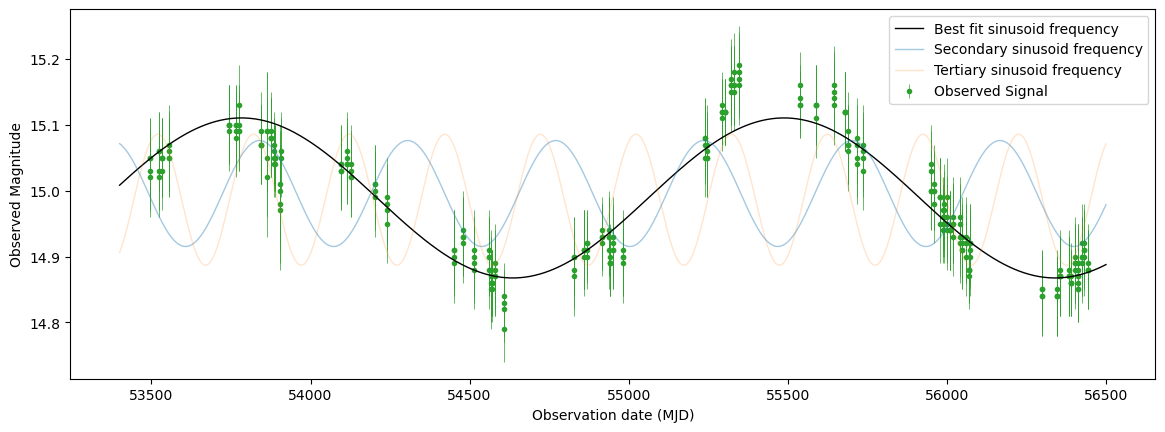

In [147]:
plt.figure().set_figwidth(14)
plt.xlabel("Observation date (MJD)")
plt.ylabel("Observed Magnitude")

t_fit = np.linspace(53400, 56500, num=1000)
y1_fit = ls.model(t_fit, freqs[top3ind[0]])
plt.plot(t_fit, y1_fit, marker='None', linestyle='-', color='black', zorder=1, lw=1, label="Best fit sinusoid frequency")
y2_fit = ls.model(t_fit, freqs[top3ind[1]])
plt.plot(t_fit, y2_fit, marker='None', linestyle='-', zorder=1, lw=1, alpha=0.4, label="Secondary sinusoid frequency")
y3_fit = ls.model(t_fit, freqs[top3ind[2]])
plt.plot(t_fit, y3_fit, marker='None', linestyle='-', zorder=1, lw=1, alpha=0.2, label="Tertiary sinusoid frequency")
plt.errorbar(t, mag, yerr=magerr, fmt=".", lw=.5, zorder=0, label="Observed Signal")
plt.legend()
plt.show()